In [ ]:
# @ElsaTH

In [454]:
import pandas as pd                                         
import numpy as np
import matplotlib.pyplot as plt 

In [455]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# OPCION B:
* Dibujar, en diferentes colores y verticalmente, los momentos en que la curva de muerte diaria aumenta y disminuye.

* Crear con barras, líneas, puntos y gráficos circulares las muertes diarias e infectadas.


In [475]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" 
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39688,NaN,NaN,International,2020-08-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39689,NaN,NaN,International,2020-08-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39690,NaN,NaN,International,2020-08-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39691,NaN,NaN,International,2020-08-25,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Procedemos a la limpieza de datos, quedandonos las columnas necesarias:

Obtenemos datos por continentes:

In [223]:
continente = data.loc[:,["continent","location","date", "total_deaths"]].dropna()
continente = data.continent.value_counts()
continente

Europe           10590
Asia              9651
Africa            9042
North America     6101
South America     2350
Oceania           1479
Name: continent, dtype: int64

Gráfica por continente del total de muertes producidas:

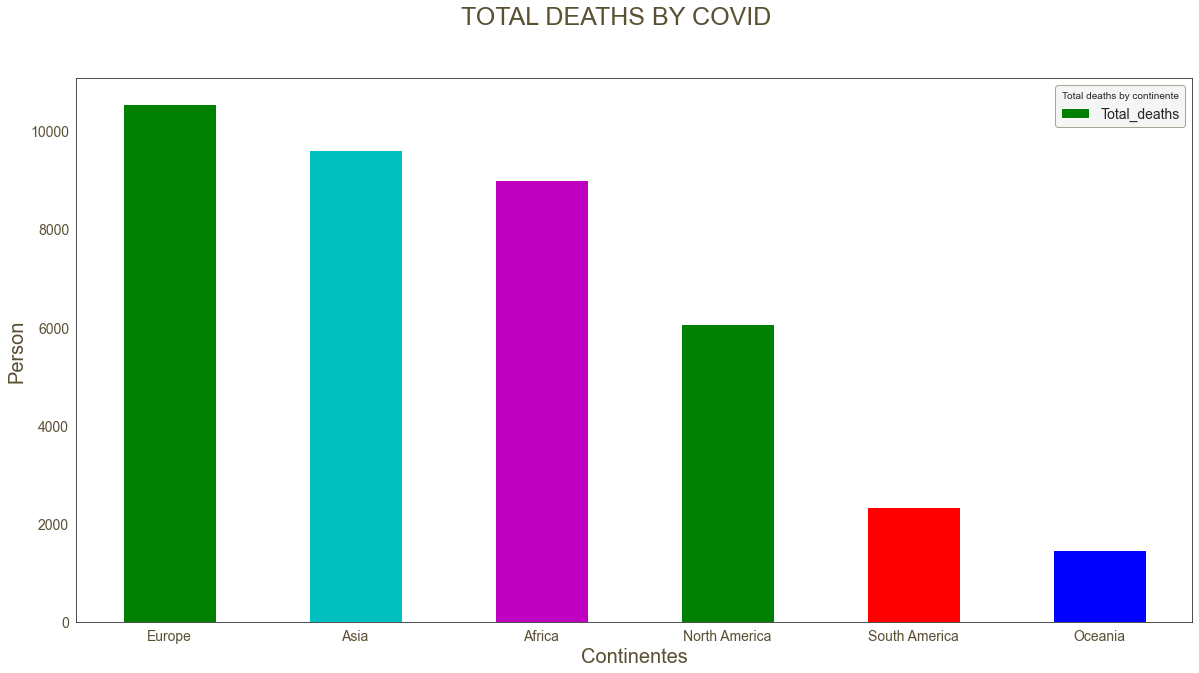

In [102]:
plt.figure(figsize=(20, 10))

continente.plot(kind="bar",label='Total_deaths',align='center',color=["g","c","m","g","r","b"])

plt.legend(title="Total deaths by continente",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('TOTAL DEATHS BY COVID', size=25, color="#5A5034")
plt.xlabel("Continentes", size=20, color="#5A5034")
plt.ylabel("Person", size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=14,color="#5A5034")
plt.yticks(rotation=0,FontSize=14,color="#5A5034")

#plt.savefig('Total_deaths_by_covid.png')
plt.show()

# Datos por paises

Limpiamos datos para obtener por nuestros países el total de muertos y nuevos casos:

In [476]:
country = data.loc[:,["location","date", "total_deaths", "new_cases"]].dropna()
country.set_index("location",inplace=True)
countries = country.loc[["Argentina", "Spain", "Chile", "Russia", "Colombia"],:]

argentina = country.loc[["Argentina"],:]
spain = country.loc[["Spain"],:]
chile = country.loc[["Chile"],:]
russia = country.loc[["Russia"],:]
colombia =country.loc[["Colombia"],:]

In [477]:
argentina.set_index("date", inplace=True)
spain.set_index("date", inplace=True)
chile.set_index("date", inplace=True)
russia.set_index("date", inplace=True)
colombia.set_index("date", inplace=True)

In [478]:
countries.reset_index("location", inplace=True)


In [479]:
countries_new_cases = countries.pivot_table('new_cases', index='date',columns='location')
countries_new_cases = countries_new_cases.fillna(0)
countries_new_cases = countries_new_cases.loc[~(countries_new_cases==0).all(axis=1)]
countries_new_cases.reset_index("date", inplace=True)
countries_new_cases

location,date,Argentina,Chile,Colombia,Russia,Spain
0,2020-02-01,0.0,0.0,0.0,2.0,1.0
1,2020-02-10,0.0,0.0,0.0,0.0,1.0
2,2020-02-25,0.0,0.0,0.0,0.0,1.0
3,2020-02-26,0.0,0.0,0.0,0.0,6.0
4,2020-02-27,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...
181,2020-08-22,8225.0,1920.0,8419.0,4870.0,0.0
182,2020-08-23,8159.0,1939.0,10965.0,4921.0,0.0
183,2020-08-24,7759.0,1957.0,8044.0,4852.0,19382.0
184,2020-08-25,14065.0,1903.0,10549.0,4744.0,7117.0


In [461]:
countries_total_deaths = countries.pivot_table('total_deaths', index='date',columns='location')
countries_total_deaths = countries_total_deaths.fillna(0)
countries_total_deaths = countries_total_deaths.loc[~(countries_total_deaths==0).all(axis=1)]
countries_total_deaths.reset_index("date", inplace=True)
countries_total_deaths

location,date,Argentina,Chile,Colombia,Russia,Spain
0,2020-03-05,0.0,0.0,0.0,0.0,1.0
1,2020-03-06,0.0,0.0,0.0,0.0,3.0
2,2020-03-07,0.0,0.0,0.0,0.0,5.0
3,2020-03-08,1.0,0.0,0.0,0.0,5.0
4,2020-03-09,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
170,2020-08-22,6567.0,10723.0,16568.0,16189.0,28838.0
171,2020-08-23,6795.0,10792.0,16968.0,16310.0,28838.0
172,2020-08-24,6848.0,10852.0,17316.0,16383.0,28872.0
173,2020-08-25,7366.0,10916.0,17612.0,16448.0,28924.0


## Dibujar, en diferentes colores y verticalmente, los momentos en que la curva de muerte diaria aumenta y disminuye.

In [ ]:
* ARGENTINA

In [289]:
argentina


,total_deaths,new_cases
date,,
2020-03-04,0.0,1.0
2020-03-06,0.0,1.0
2020-03-07,0.0,6.0
2020-03-08,1.0,1.0
2020-03-09,1.0,3.0
...,...,...
2020-08-22,6567.0,8225.0
2020-08-23,6795.0,8159.0
2020-08-24,6848.0,7759.0


In [ ]:
En Argentina se empezaron a contabilizar los datos a partir del 2020-03-26, asique elimino los días anteriores.

In [424]:
argentina = argentina.loc["2020-03-26":,:]

* Representación gráfica de Total_deats en Argentina:

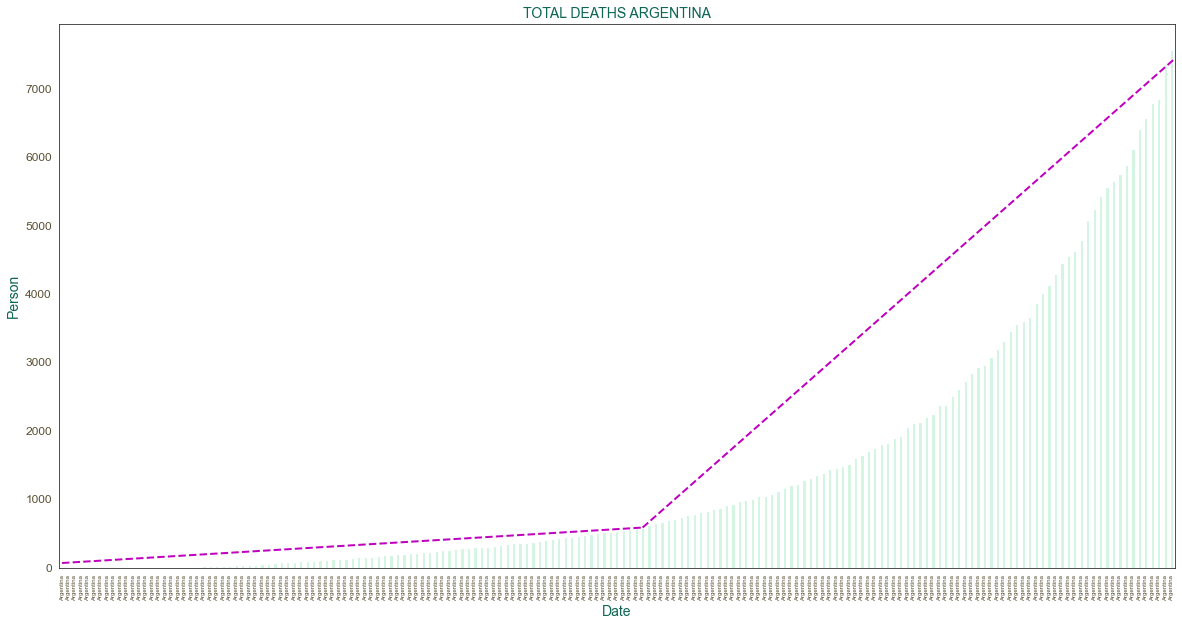

In [426]:
argentina.total_deaths.plot(kind='bar',figsize=(20,10), rot=-45, color="#D5F5E3")

plt.xlabel("Date", size=14, color="#0E6655")
plt.ylabel("Person", size=14, color="#0E6655")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.title("TOTAL DEATHS ARGENTINA" ,size=14, color="#0E6655")
plt.plot ([0,90], [70,588],lw = 2,color='m',linestyle="--")
plt.plot ([90,174], [588,7563],lw = 2,color='m',linestyle="--")

plt.savefig('evolucion_muertes_diarias_argentina.png')
plt.show()

En Colombia se empezaron a contabilizar los datos a partir del 2020-03-31, asique elimino los días anteriores.

In [307]:
colombia = colombia.loc["2020-03-31":,:]

* Representación gráfica Total_deats en Colombia:

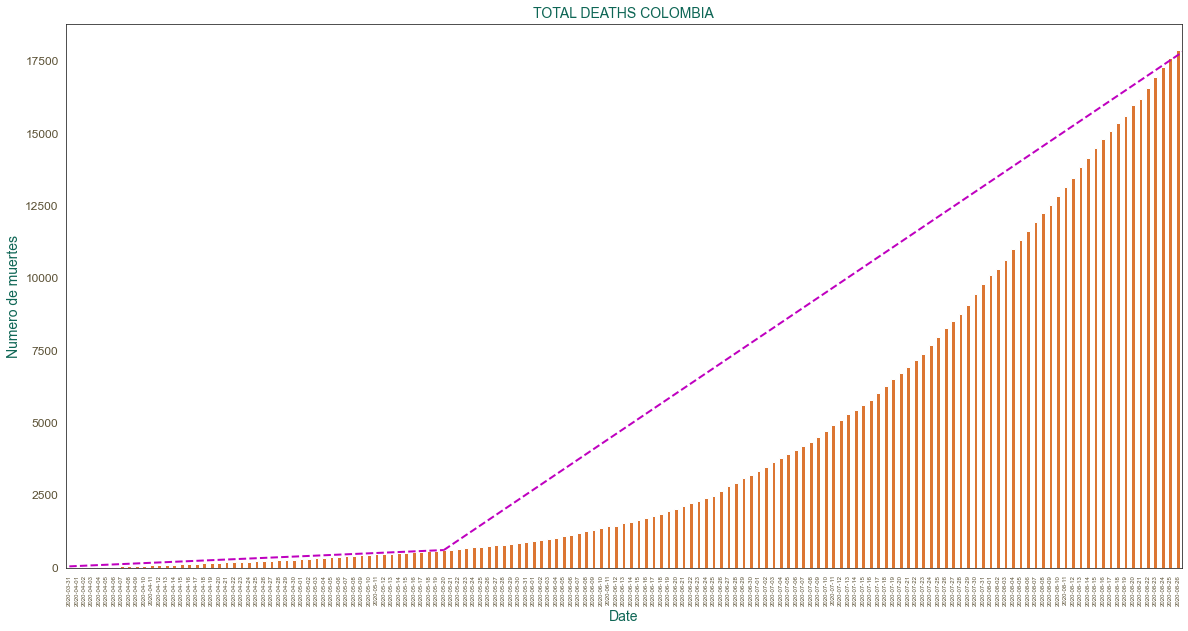

In [352]:
colombia.total_deaths.plot(kind='bar',figsize=(20,10), rot=-45, color="#DC7633")

plt.xlabel("Date", size=14, color="#0E6655")
plt.ylabel("Numero de muertes", size=14, color="#0E6655")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.title("TOTAL DEATHS COLOMBIA",size=14, color="#0E6655")
plt.plot ([0,50], [50,613],lw = 2,color='m',linestyle="--")
plt.plot ([50,149], [613,17889],lw = 2,color='m',linestyle="--")

plt.savefig('evolucion_muertes_diarias_colombia.png')
plt.show()

En España se empezaron a contabilizar los datos a partir del 2020-03-11, asique elimino los días anteriores.

In [315]:
spain = spain.loc["2020-03-11":,:]

* Representación gráfica Total_deats en España:

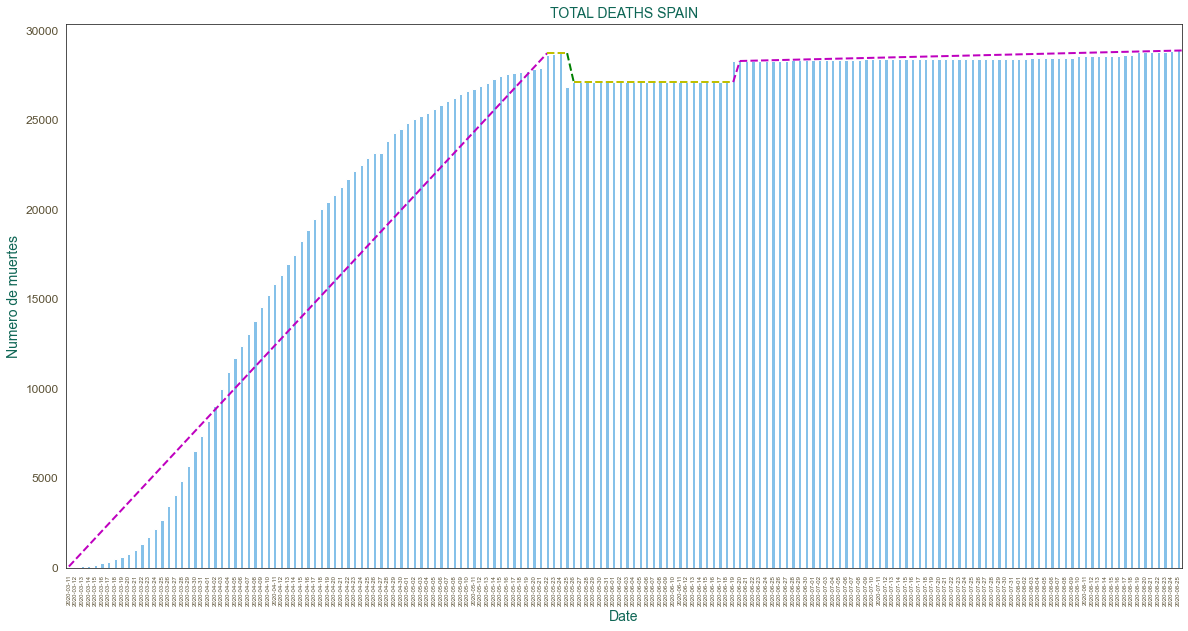

In [356]:
spain.total_deaths.plot(kind='bar',figsize=(20,10), rot=-45, color="#85C1E9")

plt.xlabel("Date", size=14, color="#0E6655")
plt.ylabel("Numero de muertes", size=14, color="#0E6655")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.title("TOTAL DEATHS SPAIN",size=14, color="#0E6655")
plt.plot ([0 ,72], [72,28752],lw = 2,color='m',linestyle="--")
plt.plot ([72 ,75], [28752,28752],lw = 2,color='y',linestyle="--")
plt.plot ([75 ,76], [28752,27136],lw = 2,color='g',linestyle="--")
plt.plot ([76 ,100], [27136,27136],lw = 2,color='y',linestyle="--")
plt.plot ([100 ,101], [27136,28315],lw = 2,color='m',linestyle="--")
plt.plot ([101 ,170], [28315, 28924],lw = 2,color='m',linestyle="--")

plt.savefig('evolucion_muertes_diarias_spain.png')
plt.show()

En Rusia se empezaron a contabilizar los datos a partir del 2020-04-02, asique elimino los días anteriores.

In [328]:
russia = russia.loc["2020-04-02":,:]

* Reprensentación gráfica Total_deats en Rusia:

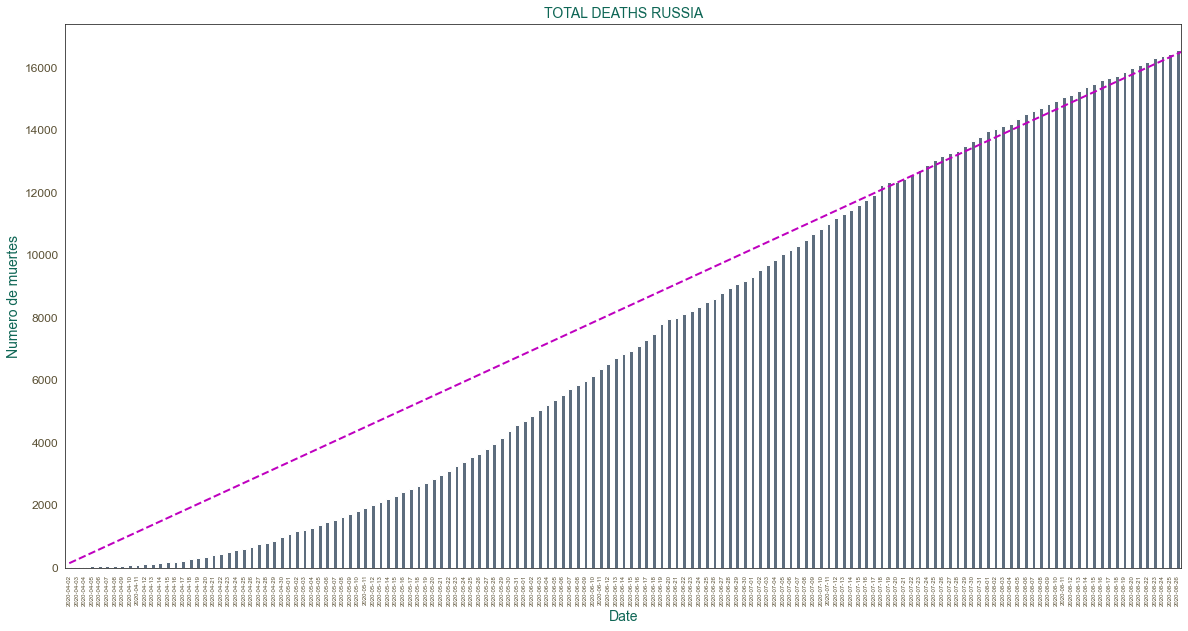

In [357]:
russia.total_deaths.plot(kind='bar',figsize=(20,10), rot=-45, color="#5D6D7E")

plt.xlabel("Date", size=14, color="#0E6655")
plt.ylabel("Numero de muertes", size=14, color="#0E6655")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.title("TOTAL DEATHS RUSSIA",size=14, color="#0E6655")
plt.plot ([0 ,147], [147,16568],lw = 2,color='m',linestyle="--")

plt.savefig('evolucion_muertes_diarias_rusia.png')
plt.show()

En Chile se empezaron a contabilizar los datos a partir del 2020-04-7, asique elimino los días anteriores.

In [330]:
chile = chile.loc["2020-04-07":,:]

* Representación gráfica Total_deats en Chile:

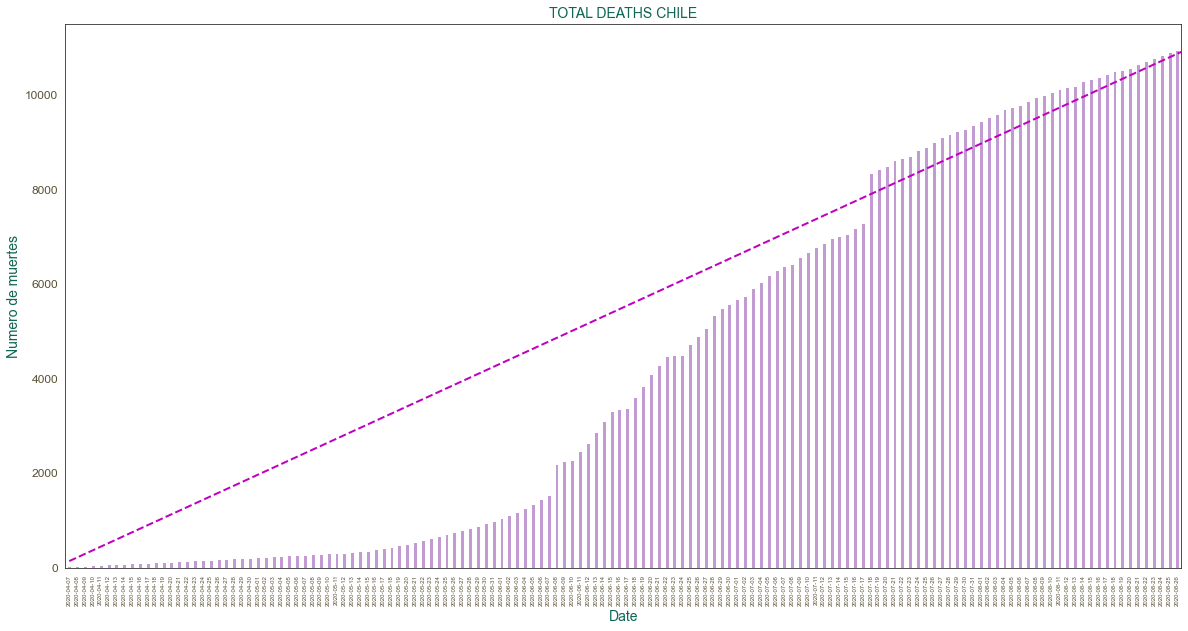

In [354]:
chile.total_deaths.plot(kind='bar',figsize=(20,10), rot=-45, color="#C39BD3")

plt.xlabel("Date", size=14, color="#0E6655")
plt.ylabel("Numero de muertes", size=14, color="#0E6655")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.title("TOTAL DEATHS CHILE",size=14, color="#0E6655")
plt.plot ([0 ,142], [142,10958],lw = 2,color='m',linestyle="--")


plt.savefig('evolucion_muertes_diarias_chile.png')
plt.show()

## GRÁFICAS DINÁMICAS DE TOTAL_DEATHS AND NEW_CASES POR PAISES

## ESPAÑA:

In [296]:
fig = go.Figure(data=go.Scatter(x=countries_total_deaths["date"],
                                y=countries_total_deaths["Spain"],
                                mode='lines',line_color="#85C1E9",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "TOTAL DEATHS SPAIN " , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

In [294]:
fig = go.Figure(data=go.Scatter(x=countries_new_cases["date"],
                                y=countries_new_cases["Spain"],
                                mode='lines',line_color="#85C1E9",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "NEW CASES SPAIN " , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

## ARGENTINA:

In [462]:
fig = go.Figure(data=go.Scatter(x=countries_total_deaths["date"],
                                y=countries_total_deaths["Argentina"],
                                mode='lines',line_color="#D5F5E3" ,fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "TOTAL DEATHS ARGENTINA" , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

In [463]:
fig = go.Figure(data=go.Scatter(x=countries_new_cases["date"],
                                y=countries_new_cases["Argentina"],
                                mode='lines',line_color="#D5F5E3",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "NEW CASES ARGENTINA" , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

## COLOMBIA:

In [298]:
fig = go.Figure(data=go.Scatter(x=countries_total_deaths["date"],
                                y=countries_total_deaths["Colombia"],
                                mode='lines',line_color="#DC7633",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "TOTAL DEATHS COLOMBIA" , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

In [303]:
fig = go.Figure(data=go.Scatter(x=countries_new_cases["date"],
                                y=countries_new_cases["Colombia"],
                                mode='lines',line_color="#DC7633",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "NEW CASES COLOMBIA" , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

## CHILE:

In [299]:
fig = go.Figure(data=go.Scatter(x=countries_total_deaths["date"],
                                y=countries_total_deaths["Chile"],
                                mode='lines',line_color="#C39BD3",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "TOTAL DEATHS CHILE " , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

In [302]:
fig = go.Figure(data=go.Scatter(x=countries_new_cases["date"],
                                y=countries_new_cases["Chile"],
                                mode='lines',line_color="#C39BD3",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "NEW CASES CHILE" , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

## RUSIA:

In [300]:
fig = go.Figure(data=go.Scatter(x=countries_total_deaths["date"],
                                y=countries_total_deaths["Russia"],
                                mode='lines',line_color="#5D6D7E",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "TOTAL DEATHS RUSSIA " , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

In [301]:
fig = go.Figure(data=go.Scatter(x=countries_new_cases["date"],
                                y=countries_new_cases["Russia"],
                                mode='lines',line_color="#5D6D7E",fillcolor='white'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='grey',tickangle = 45  )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')
fig . update_layout ( 
    title = "NEW CASES RUSSIA " , 
    xaxis_title = "Date" , 
    yaxis_title = "Number Person" , 
    legend_title = None ,
    
    plot_bgcolor="white", 
    font = dict ( 
        family = "Courier New, monospace" , 
        size = 14 , 
        color = "#138D75"
    ) 
)
fig.show() 

## Crear con barras, líneas, puntos y gráficos circulares las muertes diarias e infectadas.

In [480]:
countries_total_deaths

location,date,Argentina,Chile,Colombia,Russia,Spain
0,2020-03-05,0.0,0.0,0.0,0.0,1.0
1,2020-03-06,0.0,0.0,0.0,0.0,3.0
2,2020-03-07,0.0,0.0,0.0,0.0,5.0
3,2020-03-08,1.0,0.0,0.0,0.0,5.0
4,2020-03-09,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
170,2020-08-22,6567.0,10723.0,16568.0,16189.0,28838.0
171,2020-08-23,6795.0,10792.0,16968.0,16310.0,28838.0
172,2020-08-24,6848.0,10852.0,17316.0,16383.0,28872.0
173,2020-08-25,7366.0,10916.0,17612.0,16448.0,28924.0


In [481]:
countries_total_deaths.set_index("date", inplace=True)
countries_total_deaths

location,Argentina,Chile,Colombia,Russia,Spain
date,,,,,
2020-03-05,0.0,0.0,0.0,0.0,1.0
2020-03-06,0.0,0.0,0.0,0.0,3.0
2020-03-07,0.0,0.0,0.0,0.0,5.0
2020-03-08,1.0,0.0,0.0,0.0,5.0
2020-03-09,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...
2020-08-22,6567.0,10723.0,16568.0,16189.0,28838.0
2020-08-23,6795.0,10792.0,16968.0,16310.0,28838.0
2020-08-24,6848.0,10852.0,17316.0,16383.0,28872.0


In [482]:
countries_new_cases

location,date,Argentina,Chile,Colombia,Russia,Spain
0,2020-02-01,0.0,0.0,0.0,2.0,1.0
1,2020-02-10,0.0,0.0,0.0,0.0,1.0
2,2020-02-25,0.0,0.0,0.0,0.0,1.0
3,2020-02-26,0.0,0.0,0.0,0.0,6.0
4,2020-02-27,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...
181,2020-08-22,8225.0,1920.0,8419.0,4870.0,0.0
182,2020-08-23,8159.0,1939.0,10965.0,4921.0,0.0
183,2020-08-24,7759.0,1957.0,8044.0,4852.0,19382.0
184,2020-08-25,14065.0,1903.0,10549.0,4744.0,7117.0


In [483]:
countries_new_cases.set_index("date", inplace=True)
countries_new_cases

location,Argentina,Chile,Colombia,Russia,Spain
date,,,,,
2020-02-01,0.0,0.0,0.0,2.0,1.0
2020-02-10,0.0,0.0,0.0,0.0,1.0
2020-02-25,0.0,0.0,0.0,0.0,1.0
2020-02-26,0.0,0.0,0.0,0.0,6.0
2020-02-27,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...
2020-08-22,8225.0,1920.0,8419.0,4870.0,0.0
2020-08-23,8159.0,1939.0,10965.0,4921.0,0.0
2020-08-24,7759.0,1957.0,8044.0,4852.0,19382.0


### GRÁFICA DE LINEA:

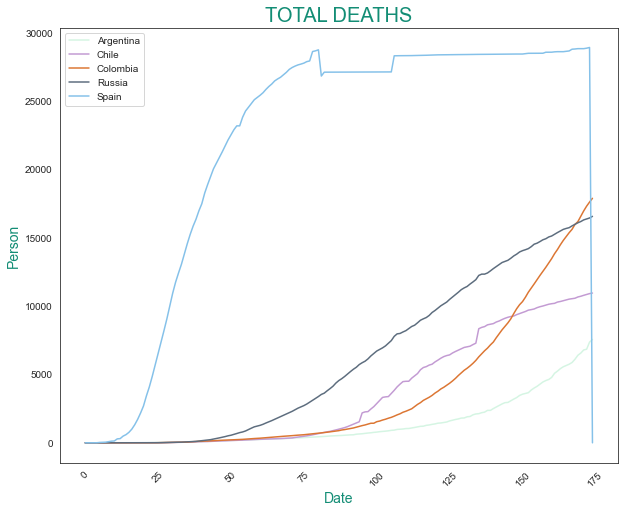

In [472]:
countries_total_deaths.plot(kind="line",figsize=(10, 8),color=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.legend(loc='top_right')
plt.title('TOTAL DEATHS', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)

plt.savefig('line_total_deaths_5_countries.png')
plt.show()

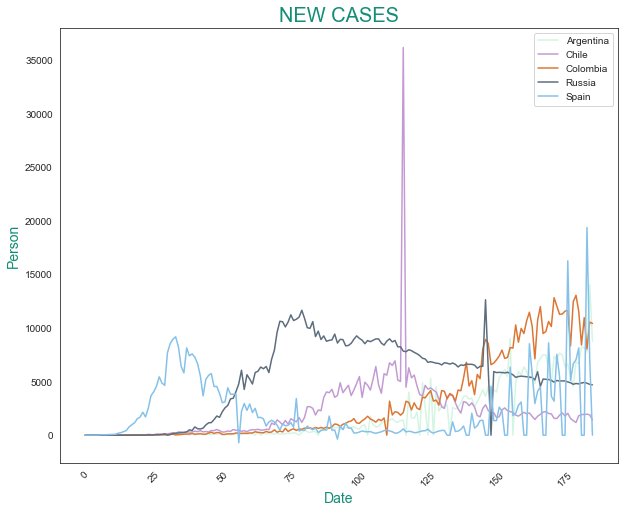

In [465]:
countries_new_cases.plot(kind="line",figsize=(10, 8),color=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.legend(loc='top_right')
plt.title('NEW CASES', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)

plt.savefig('line_new_cases_5_countries.png')
plt.show()

### GRÁFICA TIPO BAR:

In [484]:
total_deaths=countries_total_deaths.sum() 
total_deaths

location
Argentina     241618.0
Chile         617252.0
Colombia      628072.0
Russia       1059187.0
Spain        3837204.0
dtype: float64

In [485]:
new_cases = countries_new_cases.sum() 
new_cases

location
Argentina    359625.0
Chile        400985.0
Colombia     562128.0
Russia       966189.0
Spain        412553.0
dtype: float64

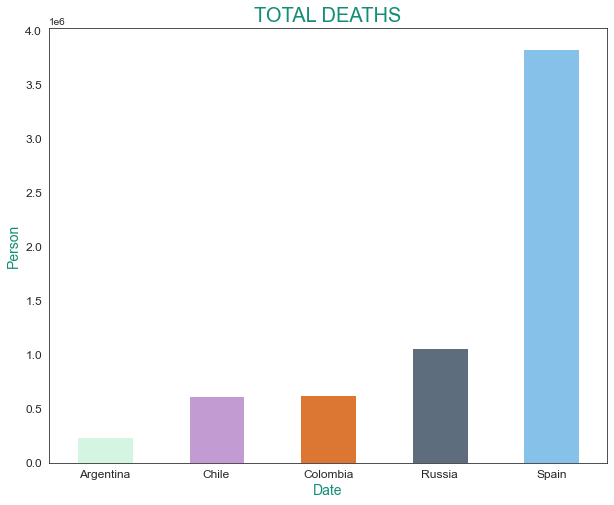

In [473]:
total_deaths.plot(kind="bar",figsize=(10, 8),color=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.title('TOTAL DEATHS', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=0,FontSize=12)
plt.yticks(rotation=0,FontSize=12)


plt.savefig('bar_total_deaths_5_countries.png')
plt.show()

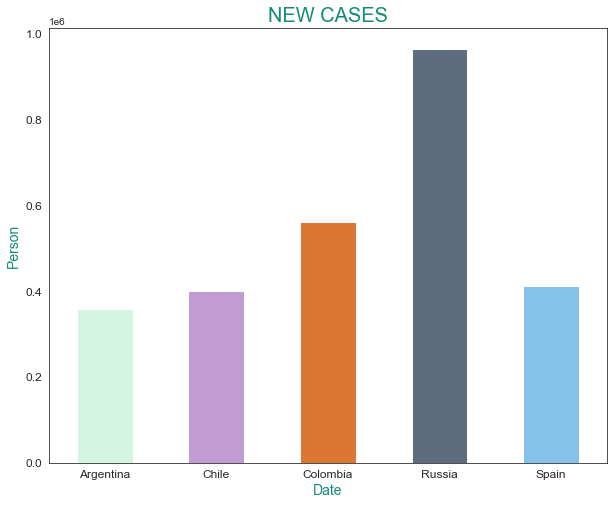

In [486]:
new_cases.plot(kind="bar",figsize=(10, 8),color=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.title('NEW CASES', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=0,FontSize=12)
plt.yticks(rotation=0,FontSize=12)

plt.savefig('bar_new_cases_5_countries.png')
plt.show()

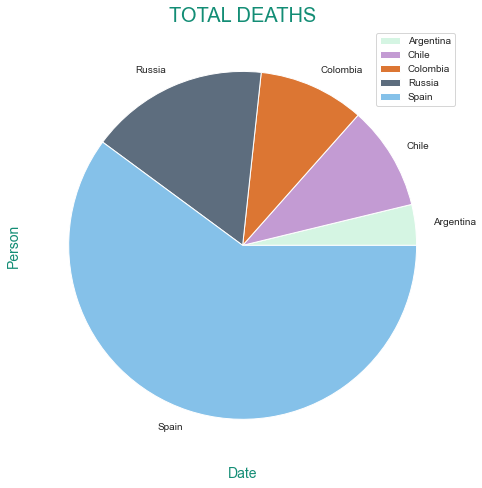

In [467]:
total_deaths.plot(kind="pie",figsize=(10, 8),colors=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.legend(loc='top_left')
plt.title('TOTAL DEATHS', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=0,FontSize=12)
plt.yticks(rotation=0,FontSize=12)

plt.savefig('pie_total_deaths_5_countries.png')
plt.show()

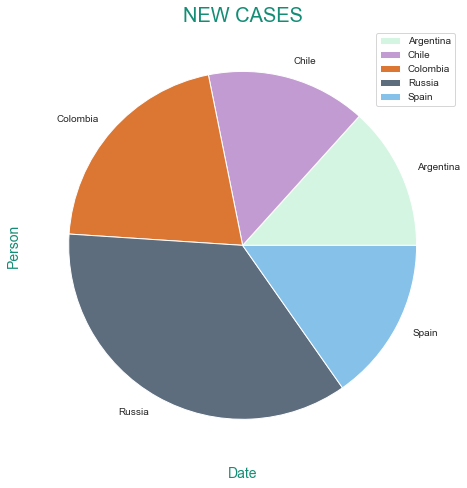

In [487]:
new_cases.plot(kind="pie",figsize=(10, 8),colors=["#D5F5E3","#C39BD3","#DC7633","#5D6D7E","#85C1E9"])

plt.legend(loc='top_left')
plt.title('NEW CASES', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=0,FontSize=12)
plt.yticks(rotation=0,FontSize=12)

plt.savefig('pie_new_cases_5_countries.png')
plt.show()

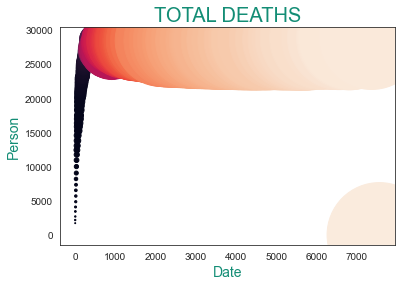

In [468]:
plt.scatter(countries_total_deaths.Argentina, countries_total_deaths.Spain, countries_total_deaths.Chile, countries_total_deaths.Russia)
plt.title("TOTAL DEATHS", size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")

plt.savefig('scatter_total_deaths_5_countries.png')
plt.show()

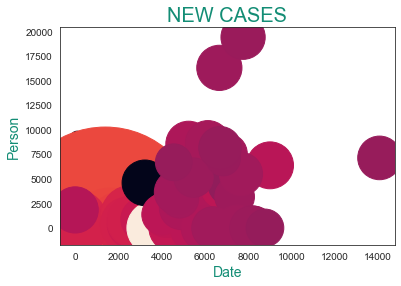

In [469]:
plt.scatter(countries_new_cases.Argentina, countries_new_cases.Spain, countries_new_cases.Chile, countries_new_cases.Russia)
plt.title("NEW CASES", size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")

plt.savefig('scatter_new_cases_5_countries.png')
plt.show()